In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [2]:
pp_data = pd.read_csv('PreprocessedData/Preprocessed.csv')
pp_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516.0,9,12,4,0,1,4,1,2174.0,0,40,38,0
1,50.0,4,83311.0,9,12,2,3,0,4,1,0.0,0,13,38,0
2,38.0,2,215646.0,11,8,0,5,1,4,1,0.0,0,40,38,0
3,53.0,2,234721.0,1,6,2,5,0,2,1,0.0,0,40,38,0
4,28.0,2,338409.0,9,12,2,9,5,2,0,0.0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45162,33.0,2,245211.0,9,12,4,9,3,4,1,0.0,0,40,38,0
45163,39.0,2,215419.0,9,12,0,9,1,4,0,0.0,0,36,38,0
45164,38.0,2,374983.0,9,12,2,9,0,4,1,0.0,0,50,38,0
45165,44.0,2,83891.0,9,12,0,0,3,1,1,5455.0,0,40,38,0


### Normalization (Standard scaler)

In [3]:
X = pp_data[['marital-status', 'education-num', 'relationship', 'sex', 'age', 'capital-gain']]
y = pp_data['income']

In [4]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Train/Test split

In [5]:
#splitting train, test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
X_train.shape, X_test.shape

((36133, 6), (9034, 6))

In [7]:
X_train.head()

,marital-status,education-num,relationship,sex,age,capital-gain
16570,-1.722256,-0.43865,-0.258480,-1.441101,0.798973,-0.23358
21745,-1.722256,-0.43865,-0.258480,0.693914,1.561715,-0.23358
14840,-0.389509,-0.43865,-0.884407,0.693914,0.112504,-0.23358
35253,-0.389509,-0.43865,-0.884407,0.693914,0.188778,-0.23358
40482,-0.389509,-0.43865,-0.884407,0.693914,0.570150,-0.23358


### Model Training

#### NAÏVE BAYES

In [8]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

# Scores on training and test sets
print("Training Set Accuracy:", model.score(X_train, y_train))
print("Test Set Accuracy:", model.score(X_test, y_test))

Naïve Bayes Classifier:
Accuracy: 0.8184635820234669
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6806
           1       0.73      0.42      0.54      2228

    accuracy                           0.82      9034
   macro avg       0.78      0.69      0.71      9034
weighted avg       0.81      0.82      0.80      9034

Training Set Accuracy: 0.8143802064594692
Test Set Accuracy: 0.8184635820234669


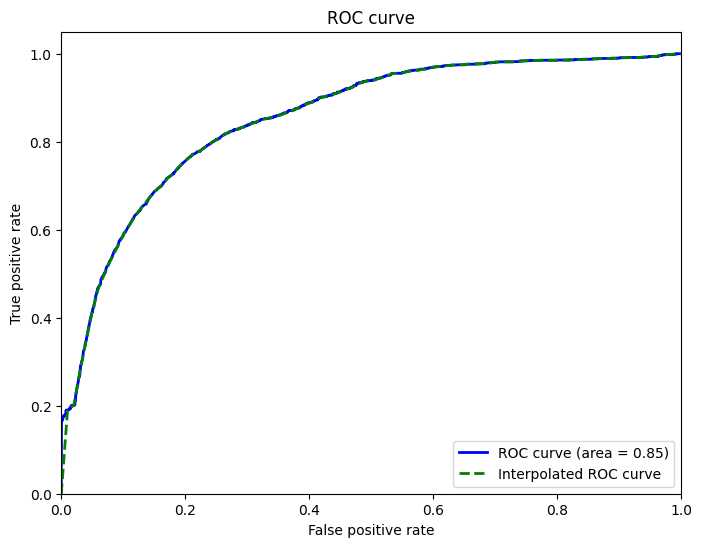

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# predict probabilities
nb_prob = model.predict_proba(X_test)[:, 1]

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_prob)

# calculate area under curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

# approximate roc curve with straight lines

num_points = 100
fpr_interp = np.linspace(0, 1, num_points)
tpr_interp = np.interp(fpr_interp, fpr, tpr)

plt.plot(fpr_interp, tpr_interp, color='green', lw=2, linestyle='--', label='Interpolated ROC curve')
plt.legend(loc='lower right')

plt.show()

In [10]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, gnb_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6448  358]
 [1282  946]]


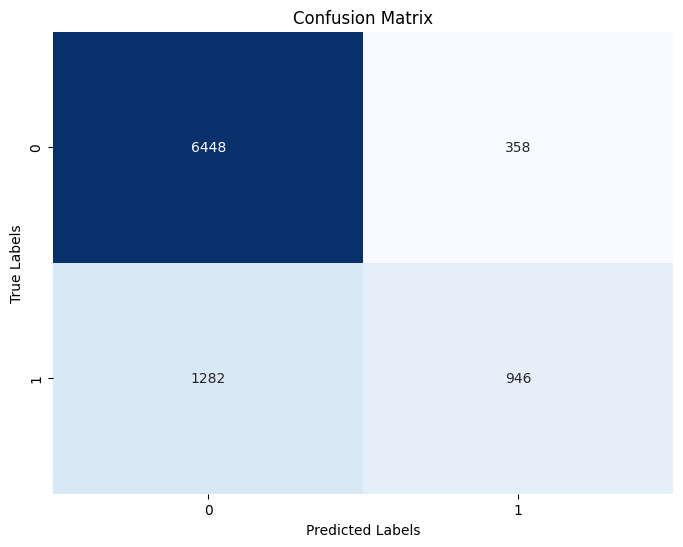

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#### Random Forest

In [12]:
# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Fit GridSearchCV
rf_model = random.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Scores on training and test sets
print("Training Set Accuracy:", random.score(X_train, y_train))
print("Test Set Accuracy:", random.score(X_test, y_test))

Random Forest Classifier:
Accuracy: 0.841044941332743
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6806
           1       0.71      0.60      0.65      2228

    accuracy                           0.84      9034
   macro avg       0.79      0.76      0.77      9034
weighted avg       0.83      0.84      0.84      9034

Training Set Accuracy: 0.8644452439598151
Test Set Accuracy: 0.841044941332743


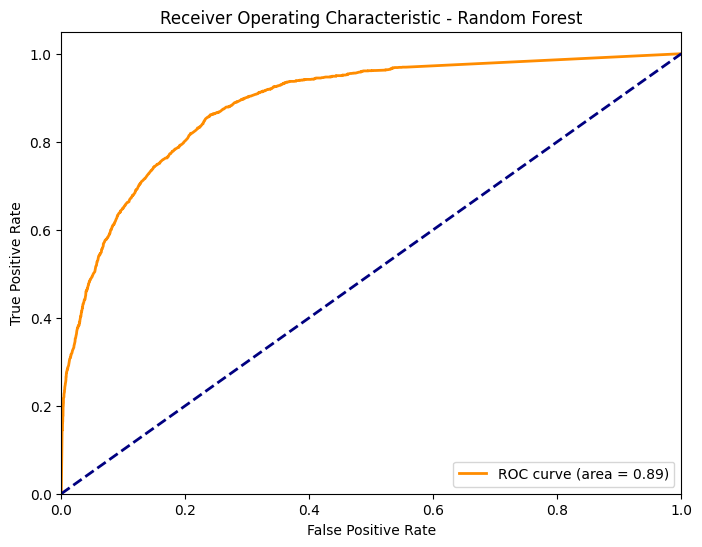

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (assuming the positive class is labeled as '1')
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_prob)

# Calculate area under the curve
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal 45 degree line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6265  541]
 [ 895 1333]]


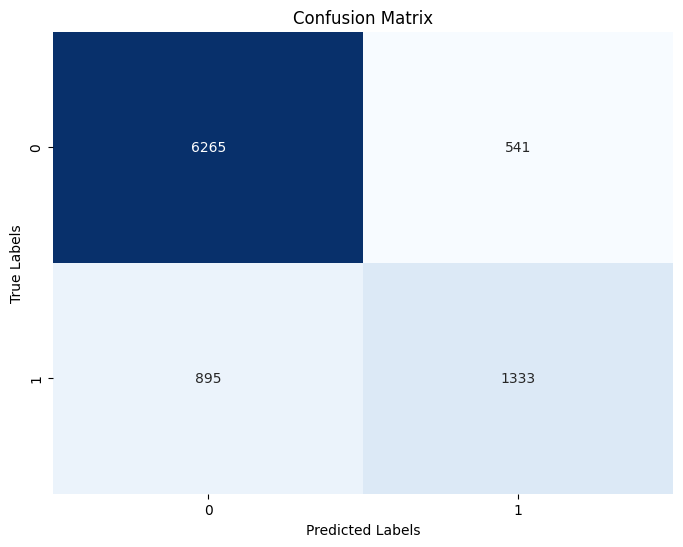

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Comparing the models

In [16]:
# Initialize classifiers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score


random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Train Random Forest classifier
rf_model = random_forest.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Naive Bayes classifier
nb_model = naive_bayes.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

# Evaluate Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions))
print("Recall:", recall_score(y_test, nb_predictions))
print("F1 Score:", f1_score(y_test, nb_predictions))
print("ROC AUC:", roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1]))


Random Forest Classifier:
Accuracy: 0.841044941332743
Precision: 0.7113127001067235
Recall: 0.598294434470377
F1 Score: 0.6499268649439298
ROC AUC: 0.8854822890985936

Naive Bayes Classifier:
Accuracy: 0.8184635820234669
Precision: 0.7254601226993865
Recall: 0.4245960502692998
F1 Score: 0.535673839184598
ROC AUC: 0.8543754758052221


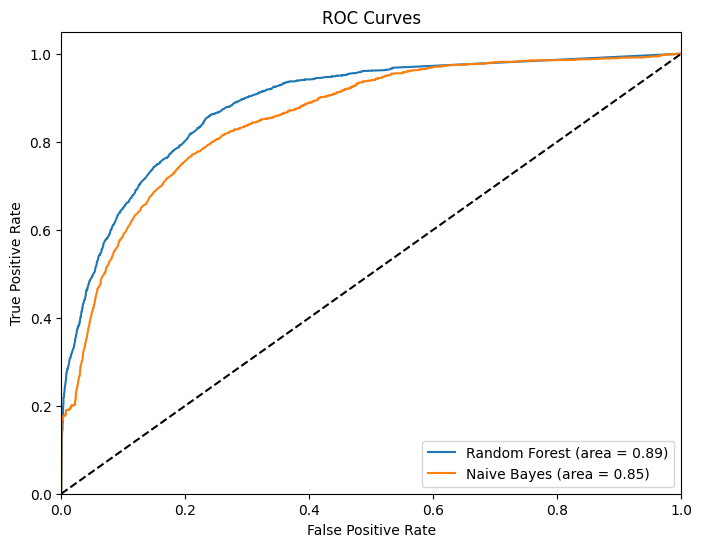

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are already defined and contain your dataset

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Predict probabilities for the test set
rf_probs = rf.predict_proba(X_test)[:, 1]

# Initialize and fit the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Predict probabilities for the test set
gnb_probs = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and ROC area for Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_probs)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
